In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs',multi_class='ovr') # C is regularization parameter inversely proportional to regularization parameter lambda

In [16]:
from sklearn import datasets
import numpy as np

In [17]:
iris = datasets.load_iris()

# selecting 2 features
X = iris.data[:,[2,3]]

# target
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [18]:
lr.fit(X_train_std,y_train)

/Users/snehil/.dev_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr')

In [19]:
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,

                          resolution=0.02):

    # setup marker generator and color map

    markers = ('o', 's', '^', 'v', '<')

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),

                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())

    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X[y == cl, 0],

                    y=X[y == cl, 1],

                    alpha=0.8,

                    c=colors[idx],

                    marker=markers[idx],

                    label=f'Class {cl}',

                    edgecolor='black')

    # highlight test examples

    if test_idx:

        # plot all examples

        X_test, y_test = X[test_idx, :], y[test_idx]

        

        plt.scatter(X_test[:, 0], X_test[:, 1],

                    c='none', edgecolor='black', alpha=1.0,

                    linewidth=1, marker='o',

                    s=100, label='Test set')


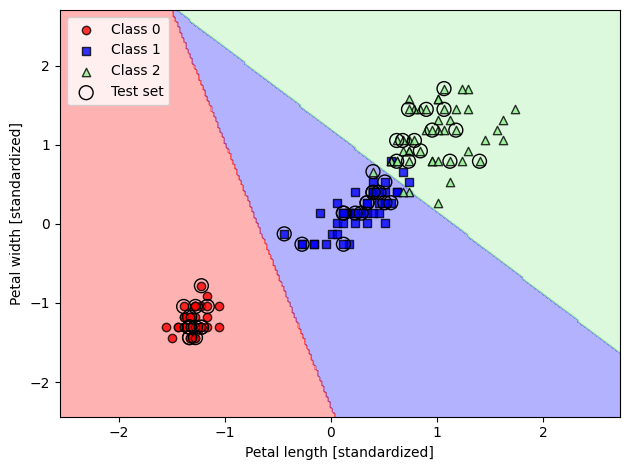

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')

plt.ylabel('Petal width [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()


In [21]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

##### The first row corresponds to the class membership probabilities of the first flower, the second row corresponds to the class membership probabilities of the second flower, and so forth. Notice that the column-wise sum in each row is 1, as expected.

##### The highest value in the first row is approximately 0.85, which means that the first example belongs to class 3 (Iris-virginica) with a predicted probability of 85 percent. So, as you may have already noticed, we can get the predicted class labels by identifying the largest column in each row, for example, using NumPy’s 

In [22]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)


array([2, 0, 0])

In [23]:
y_pred = lr.predict(X_test_std)

In [24]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [25]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1
